In [1]:
import pandas as pd

In [3]:
dataset = pd.read_csv("50_Startups.csv")
print(dataset)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [7]:
dataset = pd.get_dummies (dataset ,drop_first=True)
print(dataset)

    R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0   165349.20       136897.80        471784.10  192261.83          False   
1   162597.70       151377.59        443898.53  191792.06          False   
2   153441.51       101145.55        407934.54  191050.39           True   
3   144372.41       118671.85        383199.62  182901.99          False   
4   142107.34        91391.77        366168.42  166187.94           True   
5   131876.90        99814.71        362861.36  156991.12          False   
6   134615.46       147198.87        127716.82  156122.51          False   
7   130298.13       145530.06        323876.68  155752.60           True   
8   120542.52       148718.95        311613.29  152211.77          False   
9   123334.88       108679.17        304981.62  149759.96          False   
10  101913.08       110594.11        229160.95  146121.95           True   
11  100671.96        91790.61        249744.55  144259.40          False   
12   93863.7

In [9]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [11]:
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
print (independent)

    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0   165349.20       136897.80        471784.10          False            True
1   162597.70       151377.59        443898.53          False           False
2   153441.51       101145.55        407934.54           True           False
3   144372.41       118671.85        383199.62          False            True
4   142107.34        91391.77        366168.42           True           False
5   131876.90        99814.71        362861.36          False            True
6   134615.46       147198.87        127716.82          False           False
7   130298.13       145530.06        323876.68           True           False
8   120542.52       148718.95        311613.29          False            True
9   123334.88       108679.17        304981.62          False           False
10  101913.08       110594.11        229160.95           True           False
11  100671.96        91790.61        249744.55          False   

In [13]:
dependent = dataset[["Profit"]]
print(dependent)

       Profit
0   192261.83
1   191792.06
2   191050.39
3   182901.99
4   166187.94
5   156991.12
6   156122.51
7   155752.60
8   152211.77
9   149759.96
10  146121.95
11  144259.40
12  141585.52
13  134307.35
14  132602.65
15  129917.04
16  126992.93
17  125370.37
18  124266.90
19  122776.86
20  118474.03
21  111313.02
22  110352.25
23  108733.99
24  108552.04
25  107404.34
26  105733.54
27  105008.31
28  103282.38
29  101004.64
30   99937.59
31   97483.56
32   97427.84
33   96778.92
34   96712.80
35   96479.51
36   90708.19
37   89949.14
38   81229.06
39   81005.76
40   78239.91
41   77798.83
42   71498.49
43   69758.98
44   65200.33
45   64926.08
46   49490.75
47   42559.73
48   35673.41
49   14681.40


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent ,dependent, test_size=0.30,random_state=0)

In [20]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

    R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
7   130298.13       145530.06        323876.68           True           False
14  119943.24       156547.42        256512.92           True           False
45    1000.23       124153.04          1903.93          False            True
48     542.05        51743.15             0.00          False            True
29   65605.48       153032.06        107138.38          False            True
15  114523.61       122616.84        261776.23          False            True
30   61994.48       115641.28         91131.24           True           False
32   63408.86       129219.61         46085.25          False           False
16   78013.11       121597.55        264346.06          False           False
42   23640.93        96189.63        148001.11          False           False
20   76253.86       113867.30        298664.47          False           False
43   15505.73       127382.30         35534.17          False   

In [231]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='friedman_mse',max_features ='log2',splitter='random')
regressor =regressor.fit(x_train,y_train)
print(regressor)

DecisionTreeRegressor(criterion='friedman_mse', max_features='log2',
                      splitter='random')


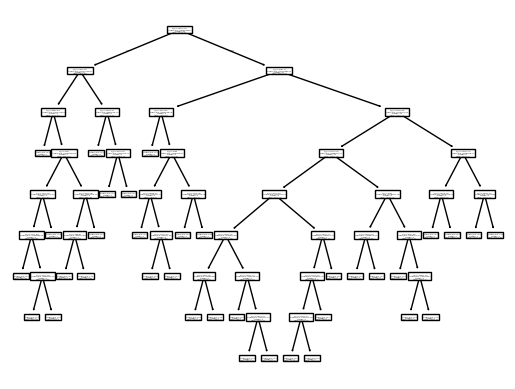

In [233]:
import matplotlib.pyplot as plt 
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [234]:
y_pred = regressor.predict(x_test)

In [235]:
print(y_pred)

[101004.64 141585.52 141585.52  90708.19 156991.12 182901.99  81005.76
 101004.64 118474.03 156991.12  90708.19  81005.76 156122.51  81005.76
 149759.96]


In [239]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)
print(r_score)

0.21940784968706395
